In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset_v2.xlsx to dataset_v2.xlsx


In [ ]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('dataset_v2.xlsx')
df.head()

,Họ và tên,Giới tính,Tuổi,"Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)","Phân nhóm tuổi (>3, <3, =3)",Địa chỉ,Ngày khám,Số điện thoại,Tiền căn,Tiền căn Tự kỷ (1-0),...,Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking),"Chỉ trỏ - Cử chỉ (0,1,2,3)\n(Making a Point)","Chú ý liên kết (1,2,3)\n(Joint Attention)","\tTiếp xúc mắt - Giao tiếp mắt (1,2,3) \n(Eye Contact)",KẾT QUẢ CHỈ ĐỊNH,CHẨN ĐOÁN,PHÂN LOẠI BỆNH,ĐIỀU TRỊ/ CAN THIỆP,Tên file nguồn,CHỈ TIÊU DỰ ĐOÁN
0,Child 1,NỮ,2 tuổi 9 tháng,2–<3 tuổi,<3 tuổi,Local 1,2025-02-21,Phone 1,Chưa ghi nhận bệnh lý liên quan,Không,...,Có,Có - Tốt,Có - Khá,Có - Khá,Đánh giá phát triển\nNgôn ngữ cảm nhận: 6 thán...,Theo dõi Rối loạn phổ tự kỷ F84.0,Theo dõi Tự kỷ l2,"CAN THIỆPHọc can thiệp cá nhân 1:1, có giáo án...",XXXXXXXXX,NaN
1,Child 2,NAM,3 tuổi 3 tháng,3–<4 tuổi,>3 tuổi,Local 2,2024-09-08,Phone 2,"Trẻ đã khám BV Nhi đồng 1 lúc 37 tháng, chẩn đ...",Đã chẩn đoán liên quan Tự kỷ,...,Không,Có - Kém,Có - Kém,Có - Khá,Đánh giá phát triển:\nNgôn ngữ cảm nhận: 11 th...,Rối loạn phổ tự kỷ F84.0,Tự kỷ,"CAN THIỆPCan thiệp cá nhân, tập trung kỹ năng ...",XXXXXXXXX,NaN
2,Child 3,NAM,2 tuổi 6 tháng,2–<3 tuổi,<3 tuổi,Local 3,2024-09-04,Phone 3,"Sinh mổ, CNLS 3.2kg, đủ tháng",Không,...,Không,Có - Khá,Có - Kém,Có - Kém,Đánh giá phát triển:\nNgôn ngữ cảm nhận: 21 th...,Rối loạn phổ tự kỷ F84.0,Tự kỷ,CAN THIỆPHọc can thiệp 1-2 giờ/ngày\nPhụ huynh...,XXXXXXXXX,NaN
3,Child 4,NỮ,1 tuổi 10 tháng,1–<2 tuổi,<3 tuổi,Local 4,2024-11-24,Phone 4,Chưa khai thác.,Không,...,Có,Có - Kém,Có - Khá,Có - Khá,Đánh giá phát triển\nNgôn ngữ cảm nhận: < 10 t...,Rối loạn phổ tự kỷ,Tự kỷ,"CAN THIỆPHọc can thiệp tại địa phương, phụ huy...",XXXXXXXXX,NaN
4,Child 5,NAM,1 tuổi 5 tháng,1–<2 tuổi,<3 tuổi,Local 5,2024-09-15,Phone 5,"Trẻ sinh thường, lúc sinh 3,5kg, đủ tháng",Không,...,Không,Có - Kém,Có - Khá,Có - Khá,Đánh giá phát triển:\nNgôn ngữ cảm nhận: 21 - ...,Chậm phát triển F79 + cần theo dõi Rối loạn ph...,Theo dõi Tự kỷ l2,CAN THIỆP- Trẻ cần được học can thiệp 1-2 giờ/...,XXXXXXXXX,NaN


In [ ]:
# Liệt kê tên các cột
print(df.columns.tolist())
rows, cols = df.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['Họ và tên', 'Giới tính', 'Tuổi', 'Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)', 'Phân nhóm tuổi (>3, <3, =3)', 'Địa chỉ', 'Ngày khám', 'Số điện thoại', 'Tiền căn', 'Tiền căn Tự kỷ (1-0)', 'Đã học can thiệp (1-0)', 'Tiền sử y khoa (0-1-2)', 'Tiền căn sinh non', 'Tái khám Tự kỷ ', 'Lý do đến khám', 'QUAN SÁT, ĐÁNH GIÁ LÂM SÀNG', 'Chậm nói (0-1)', 'Cứng nhắc (0-1)', 'Cô lập - Isolation (0-1)', 'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)\n(Sensorimotor Play)', 'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)\n(Functional Play)', 'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)\n(Combinatorial Play)', 'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)\n(Symbolic Play)\n', 'Hành vi lặp lại liên tục - p5 (0-1)\n(Repetitive/Stereotyped Play)', 'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)\n(Không đặc hiệu)', 'Chơi luân phiên (0,1,2,3)\n(turn-taking play)', 'Bắt chước (0,1,2,3)\n(Imitation)', 'Sai việc - Nhờ vả trẻ (0,1,2,3)', 'Phản ứng với tên gọi từ

# 1. LÀM SẠCH DỮ LIỆU

## 1.1. ĐIỀN DỮ LIỆU THIẾU VÀ LOẠI BỎ CÁC CỘT KHÔNG CẦN THIẾT

In [ ]:
# Kiểm tra giá trị thiếu trong từng cột
df.isna().sum()

,0
Họ và tên,0
Giới tính,0
Tuổi,0
"Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)",0
"Phân nhóm tuổi (>3, <3, =3)",0
Địa chỉ,0
Ngày khám,0
Số điện thoại,0
Tiền căn,2
Tiền căn Tự kỷ (1-0),0


In [ ]:
# Điền giá trị "Không có dữ liệu" vào các ô trống
df.fillna("Không có dữ liệu", inplace=True)

# Kiểm tra lại sau khi điền
print(df.isna().sum())  # Đảm bảo không còn ô trống nào

Họ và tên                                                                                                   0
Giới tính                                                                                                   0
Tuổi                                                                                                        0
Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)                                                   0
Phân nhóm tuổi (>3, <3, =3)                                                                                 0
Địa chỉ                                                                                                     0
Ngày khám                                                                                                   0
Số điện thoại                                                                                               0
Tiền căn                                                                                                    0
Tiền căn T

BỎ CÁC CỘT KHÔNG CẦN THIẾT

In [ ]:
# Danh sách các cột cần loại bỏ
columns_to_drop = [
    'Họ và tên', 'Phân nhóm tuổi (>3, <3, =3)', 'Địa chỉ', 'Ngày khám', 'Số điện thoại',
    'Tiền căn', 'Tiền căn sinh non', 'Tái khám Tự kỷ ', 'Lý do đến khám', 'QUAN SÁT, ĐÁNH GIÁ LÂM SÀNG',
    'KẾT QUẢ CHỈ ĐỊNH ', 'CHẨN ĐOÁN', 'ĐIỀU TRỊ/ CAN THIỆP', 'Tên file nguồn', 'CHỈ TIÊU DỰ ĐOÁN '
]

# Loại bỏ các cột không cần thiết
df = df.drop(columns=columns_to_drop)

# Kiểm tra lại DataFrame sau khi loại bỏ cột
df.head()

,Giới tính,Tuổi,"Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)",Tiền căn Tự kỷ (1-0),Đã học can thiệp (1-0),Tiền sử y khoa (0-1-2),Chậm nói (0-1),Cứng nhắc (0-1),Cô lập - Isolation (0-1),"Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)\n(Sensorimotor Play)",...,"Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)\n(Không đặc hiệu)","Chơi luân phiên (0,1,2,3)\n(turn-taking play)","Bắt chước (0,1,2,3)\n(Imitation)","Sai việc - Nhờ vả trẻ (0,1,2,3)","Phản ứng với tên gọi từ mốc 1 tuổi (0,1,2,3)\n( Không đặc hiệu)\n(Response to Name in Infants)",Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking),"Chỉ trỏ - Cử chỉ (0,1,2,3)\n(Making a Point)","Chú ý liên kết (1,2,3)\n(Joint Attention)","\tTiếp xúc mắt - Giao tiếp mắt (1,2,3) \n(Eye Contact)",PHÂN LOẠI BỆNH
0,NỮ,2 tuổi 9 tháng,2–<3 tuổi,Không,Đã học can thiệp,Không,Có,Không,Có,Không ĐG - BT,...,Có - Kém,Có - Kém,Có - Tốt,Có - Kém,Có - Tốt,Có,Có - Tốt,Có - Khá,Có - Khá,Theo dõi Tự kỷ l2
1,NAM,3 tuổi 3 tháng,3–<4 tuổi,Đã chẩn đoán liên quan Tự kỷ,Không,Không,Có,Không,Có,Không ĐG - BT,...,Có - Kém,Không ĐG,Không ĐG,Có - Khá,Không ĐG,Không,Có - Kém,Có - Kém,Có - Khá,Tự kỷ
2,NAM,2 tuổi 6 tháng,2–<3 tuổi,Không,Không,Không,Có,Không,Không,Không ĐG - BT,...,Có - Kém,Không ĐG,Có - Tốt,Không - ĐG,Có - Kém,Không,Có - Khá,Có - Kém,Có - Kém,Tự kỷ
3,NỮ,1 tuổi 10 tháng,1–<2 tuổi,Không,Không,Không,Không,Không,Không,Có - Nghi ngờ,...,Có - Kém,Không ĐG,Có - Kém,Không - ĐG,Có - Kém,Có,Có - Kém,Có - Khá,Có - Khá,Tự kỷ
4,NAM,1 tuổi 5 tháng,1–<2 tuổi,Không,Không,Không,Có,Không,Không,Có - Nghi ngờ,...,Có - Kém,Không ĐG,Có - Kém,Không - ĐG,Có - Kém,Không,Có - Kém,Có - Khá,Có - Khá,Theo dõi Tự kỷ l2


In [ ]:
print(df.columns.tolist())

['Giới tính', 'Tuổi', 'Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)', 'Tiền căn Tự kỷ (1-0)', 'Đã học can thiệp (1-0)', 'Tiền sử y khoa (0-1-2)', 'Chậm nói (0-1)', 'Cứng nhắc (0-1)', 'Cô lập - Isolation (0-1)', 'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)\n(Sensorimotor Play)', 'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)\n(Functional Play)', 'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)\n(Combinatorial Play)', 'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)\n(Symbolic Play)\n', 'Hành vi lặp lại liên tục - p5 (0-1)\n(Repetitive/Stereotyped Play)', 'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)\n(Không đặc hiệu)', 'Chơi luân phiên (0,1,2,3)\n(turn-taking play)', 'Bắt chước (0,1,2,3)\n(Imitation)', 'Sai việc - Nhờ vả trẻ (0,1,2,3)', 'Phản ứng với tên gọi từ mốc 1 tuổi (0,1,2,3)\n( Không đặc hiệu)\n(Response to Name in Infants)', 'Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking)', 'Chỉ trỏ - Cử chỉ (0,1,2,3)\n(Making a Point)', 'Chú ý liên kết 

## 1.2. MÃ HÓA GIÁ TRỊ CÁC CỘT

Mã hóa các cột với Label Encoding (Manual Mapping) vì cần chỉ định thứ thự cho các giá trị của cột vì đây là một bộ dữ liệu có tính chất phân loại thứ tự (ordinal)

In [ ]:
# Kiểm tra kiểu dữ liệu của từng cột
print(df.dtypes)

Giới tính                                                                                                   object
Tuổi                                                                                                        object
Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)                                                   object
Tiền căn Tự kỷ (1-0)                                                                                        object
Đã học can thiệp (1-0)                                                                                      object
Tiền sử y khoa (0-1-2)                                                                                      object
Chậm nói (0-1)                                                                                              object
Cứng nhắc (0-1)                                                                                             object
Cô lập - Isolation (0-1)                                                        

In [ ]:
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    print(f"Cột '{col}' có {unique_vals} giá trị duy nhất")


Cột 'Giới tính' có 2 giá trị duy nhất
Cột 'Tuổi' có 70 giá trị duy nhất
Cột 'Phân nhóm tuổi chung
(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)' có 4 giá trị duy nhất
Cột 'Tiền căn Tự kỷ (1-0)' có 2 giá trị duy nhất
Cột 'Đã học can thiệp (1-0)' có 2 giá trị duy nhất
Cột 'Tiền sử y khoa (0-1-2)' có 4 giá trị duy nhất
Cột 'Chậm nói (0-1)' có 2 giá trị duy nhất
Cột 'Cứng nhắc (0-1)' có 2 giá trị duy nhất
Cột 'Cô lập - Isolation (0-1)' có 2 giá trị duy nhất
Cột 'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)
(Sensorimotor Play)' có 4 giá trị duy nhất
Cột 'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)
(Functional Play)' có 7 giá trị duy nhất
Cột 'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)
(Combinatorial Play)' có 6 giá trị duy nhất
Cột 'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)
(Symbolic Play)
' có 4 giá trị duy nhất
Cột 'Hành vi lặp lại liên tục - p5 (0-1)
(Repetitive/Stereotyped Play)' có 4 giá trị duy nhất
Cột 'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)
(Kh

### MÃ HÓA CÁC CỘT VỀ 0-1

In [ ]:
# MÃ HÓA CÁC CỘT CÓ - KHÔNG

# Danh sách các cột cần chuyển đổi
binary_columns = [
    'Chậm nói (0-1)', 'Cứng nhắc (0-1)', 'Cô lập - Isolation (0-1)', 'Hành vi lặp lại liên tục - p5 (0-1)\n(Repetitive/Stereotyped Play)',
    'Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking)'
]

# Chuyển "Có" thành 1 và "Không" thành 0
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'có' else (0 if isinstance(x, str) and x.strip().lower() == 'không' else x))

# Kiểm tra lại dữ liệu
print(df[binary_columns].head())

# -------------------------

# Chuyển "Đã chẩn đoán liên quan Tự kỷ" thành 1 và "Không" thành 0, bất kể chữ hoa hay chữ thường
pre_asd = ['Tiền căn Tự kỷ (1-0)']

# Chuyển các giá trị thành số và tránh lỗi về chữ hoa chữ thường
for col in pre_asd:
    df[col] = df[col].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == 'đã chẩn đoán liên quan tự kỷ' else (0 if isinstance(x, str) and x.strip().lower() == 'không' else x))

# Kiểm tra lại sau khi chuyển đổi
print(df[pre_asd].head())

# -----------------------

# Chuyển "Đã học can thiệp" thành 1 và "Không" thành 0, bất kể chữ hoa hay chữ thường
learned = ['Đã học can thiệp (1-0)']

# Chuyển các giá trị thành số và tránh lỗi về chữ hoa chữ thường
for col in learned:
    df[col] = df[col].apply(lambda x: 1 if isinstance(x, str) and 'đã học can thiệp' in x.strip().lower() else (0 if isinstance(x, str) and 'không' in x.strip().lower() else x))

# Kiểm tra lại sau khi chuyển đổi
print(df[learned].head())


   Chậm nói (0-1)  Cứng nhắc (0-1)  Cô lập - Isolation (0-1)  \
0               1                0                         1   
1               1                0                         1   
2               1                0                         0   
3               0                0                         0   
4               1                0                         0   

   Hành vi lặp lại liên tục - p5 (0-1)\n(Repetitive/Stereotyped Play)  \
0                                                  0                    
1                                                  1                    
2                                                  0                    
3                                                  1                    
4                                                  0                    

   Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking)  
0                                             1  
1                                             0  
2                         

In [ ]:
# Mã hóa cột GTinh

gener = ['Giới tính']

# Chuyển "NAM" thành 1 và "NỮ" thành 0, bất kể chữ hoa chữ thường
for col in gener:
    df[col] = df[col].apply(lambda x: 1 if isinstance(x, str) and 'nam' in x.strip().lower() else (0 if isinstance(x, str) and 'nữ' in x.strip().lower() else x))

# Kiểm tra lại sau khi chuyển đổi
print(df[gener].head())

   Giới tính
0          0
1          1
2          1
3          0
4          1


In [ ]:
# Mã hóa Tuổi thành giá trị số.

import pandas as pd

# Giả sử cột 'Tuổi' chứa các giá trị như "2 tuổi 9 tháng"
df['Tuổi'] = df['Tuổi'].apply(lambda x: round(int(x.split()[0]) + int(x.split()[2])/12, 2) if isinstance(x, str) else x)

# Kiểm tra kết quả
print(df['Tuổi'].head())


0    2.75
1    3.25
2    2.50
3    1.83
4    1.42
Name: Tuổi, dtype: float64


In [ ]:
# Kiểm tra các giá trị duy nhất trong cột 'Phân nhóm tuổi chung'
print(df['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'].unique())


['2–<3 tuổi' '3–<4 tuổi' '1–<2 tuổi' '>=4 tuổi']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Đảm bảo rằng cột phân nhóm tuổi có giá trị theo thứ tự từ nhỏ đến lớn
age_groups = ['<1', '1–<2', '2–<3', '3–<4', '>=4']

# Chuẩn hóa giá trị trong cột phân nhóm tuổi (loại bỏ "tuổi" và chuyển thành chữ thường)
df['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'] = df['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'].apply(lambda x: str(x).lower().replace('tuổi', '').strip())

# Khởi tạo OrdinalEncoder và mã hóa theo thứ tự này
ordinal_encoder = OrdinalEncoder(categories=[age_groups])

# Mã hóa cột 'Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'
df['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'] = ordinal_encoder.fit_transform(df[['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)']])

# Kiểm tra kết quả
print(df[['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)']].head())

   Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)
0                                                2.0        
1                                                3.0        
2                                                2.0        
3                                                1.0        
4                                                1.0        


In [ ]:
# Kiểm tra kết quả sau khi mã hóa
print("Unique values after encoding:")
print(df['Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)'].unique())
print("-" * 50)

Unique values after encoding:
[2. 3. 1. 4.]
--------------------------------------------------


### MÃ HÓA CÁC CỘT GIÁ TRỊ "KH ĐG - KÉM - BT - TỐT" > 0-1-2-3

In [ ]:
pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
import re
from unidecode import unidecode

# Danh sách các cột phân loại cần mã hóa
ordinal_columns4 = [
    'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)\n(Functional Play)',
    'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)\n(Combinatorial Play)',
    'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)\n(Symbolic Play)\n',
    'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)\n(Không đặc hiệu)',
    'Chơi luân phiên (0,1,2,3)\n(turn-taking play)',
    'Bắt chước (0,1,2,3)\n(Imitation)',
    'Sai việc - Nhờ vả trẻ (0,1,2,3)',
    'Phản ứng với tên gọi từ mốc 1 tuổi (0,1,2,3)\n( Không đặc hiệu)\n(Response to Name in Infants)',
    'Chỉ trỏ - Cử chỉ (0,1,2,3)\n(Making a Point)'
]

# Tạo từ điển ánh xạ các giá trị phân loại thành số
mapping = {
    'cotot': 3,
    'cokha': 2,
    'cokem': 1,
    'khongdg': 0
}

# Chuẩn hóa dữ liệu: loại bỏ dấu cách thừa, chuyển tất cả về chữ thường, chuyển thành chữ không dấu và loại bỏ tất cả ký tự đặc biệt
for col in ordinal_columns4:
    df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', unidecode(str(x).strip().lower())) if isinstance(x, str) else x)

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa (loại bỏ khoảng trắng, chuyển về chữ không dấu và loại bỏ ký tự đặc biệt)
for col in ordinal_columns4:
    print(f"Unique values in '{col}' after cleaning:")
    print(df[col].unique())
    print("-" * 50)

# Áp dụng ánh xạ cho các cột phân loại
for col in ordinal_columns4:
    df[col] = df[col].map(mapping)

# Kiểm tra các giá trị duy nhất sau khi mã hóa
for col in ordinal_columns4:
    print(f"Unique values in '{col}' after encoding:")
    print(df[col].unique())
    print("-" * 50)



Unique values in 'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)
(Functional Play)' after cleaning:
['khongdg' 'cotot' 'cokem' 'cokha']
--------------------------------------------------
Unique values in 'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)
(Combinatorial Play)' after cleaning:
['cokha' 'cotot' 'cokem' 'khongdg']
--------------------------------------------------
Unique values in 'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)
(Symbolic Play)
' after cleaning:
['khongdg' 'cokha' 'cokem' 'cotot']
--------------------------------------------------
Unique values in 'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)
(Không đặc hiệu)' after cleaning:
['cokem' 'cokha' 'khongdg' 'cotot']
--------------------------------------------------
Unique values in 'Chơi luân phiên (0,1,2,3)
(turn-taking play)' after cleaning:
['cokem' 'khongdg' 'cokha' 'cotot']
--------------------------------------------------
Unique values in 'Bắt chước (0,1,2,3)
(Imitation)' after cleanin

### MÃ HÓA CÁC GIÁ TRỊ "KÉM - BT- TỐT" 1,2,3

In [ ]:
ordinal_columns3 = [
    'Chú ý liên kết (1,2,3)\n(Joint Attention)',
    '\tTiếp xúc mắt - Giao tiếp mắt (1,2,3) \n(Eye Contact)'
]

In [ ]:
for col in ordinal_columns3:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in 'Chú ý liên kết (1,2,3)
(Joint Attention)':
['Có - Khá' 'Có - Kém' 'Có - Tốt']
--------------------------------------------------
Unique values in '	Tiếp xúc mắt - Giao tiếp mắt (1,2,3) 
(Eye Contact)':
['Có - Khá' 'Có - Kém' 'Có - Tốt']
--------------------------------------------------


In [ ]:
# Tạo từ điển ánh xạ các giá trị phân loại thành số
mapping = {
    'cotot': 3,
    'cokha': 2,
    'cokem': 1
}

# Chuẩn hóa dữ liệu: loại bỏ dấu cách thừa, chuyển tất cả về chữ thường, chuyển thành chữ không dấu và loại bỏ tất cả ký tự đặc biệt
for col in ordinal_columns3:
    df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', unidecode(str(x).strip().lower())) if isinstance(x, str) else x)

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa (loại bỏ khoảng trắng, chuyển về chữ không dấu và loại bỏ ký tự đặc biệt)
for col in ordinal_columns3:
    print(f"Unique values in '{col}' after cleaning:")
    print(df[col].unique())
    print("-" * 50)

# Áp dụng ánh xạ cho các cột phân loại
for col in ordinal_columns3:
    df[col] = df[col].map(mapping)

# Kiểm tra các giá trị duy nhất sau khi mã hóa
for col in ordinal_columns3:
    print(df[col].unique())
    print("-" * 50)


Unique values in 'Chú ý liên kết (1,2,3)
(Joint Attention)' after cleaning:
['cokha' 'cokem' 'cotot']
--------------------------------------------------
Unique values in '	Tiếp xúc mắt - Giao tiếp mắt (1,2,3) 
(Eye Contact)' after cleaning:
['cokha' 'cokem' 'cotot']
--------------------------------------------------
[2 1 3]
--------------------------------------------------
[2 1 3]
--------------------------------------------------


In [ ]:
# Danh sách các cột phân loại cần mã hóa
ordinal_columns3x = [
    'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)\n(Sensorimotor Play)'
]

In [ ]:
for col in ordinal_columns3x:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in 'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)
(Sensorimotor Play)':
['Không ĐG - BT' 'Có - Nghi ngờ' 'Có - Nguy cơ' 'Có - Nguy cơ ']
--------------------------------------------------


In [ ]:
# Tạo từ điển ánh xạ các giá trị phân loại thành số
mapping = {
    'khongdgbt': 3,
    'conghingo': 2,
    'conguyco': 1
}

# Chuẩn hóa dữ liệu: loại bỏ dấu cách thừa, chuyển tất cả về chữ thường, chuyển thành chữ không dấu và loại bỏ tất cả ký tự đặc biệt
for col in ordinal_columns3x:
    df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', unidecode(str(x).strip().lower())) if isinstance(x, str) else x)

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa (loại bỏ khoảng trắng, chuyển về chữ không dấu và loại bỏ ký tự đặc biệt)
for col in ordinal_columns3x:
    print(f"Unique values in '{col}' after cleaning:")
    print(df[col].unique())
    print("-" * 50)

# Áp dụng ánh xạ cho các cột phân loại
for col in ordinal_columns3x:
    df[col] = df[col].map(mapping)

# Kiểm tra các giá trị duy nhất sau khi mã hóa
for col in ordinal_columns3x:
    print(df[col].unique())
    print("-" * 50)


Unique values in 'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)
(Sensorimotor Play)' after cleaning:
['khongdgbt' 'conghingo' 'conguyco']
--------------------------------------------------
[3 2 1]
--------------------------------------------------


In [ ]:
# MÃ HÓA CỘT KẾT QUẢ - PHÂN LOẠI ASD

orinal_column_result = 'PHÂN LOẠI BỆNH'

# Kiểm tra các giá trị duy nhất trong cột 'PHÂN LOẠI BỆNH'
print(f"Unique values in '{orinal_column_result}':")
print(df[orinal_column_result].unique())
print("-" * 50)


Unique values in 'PHÂN LOẠI BỆNH':
['Theo dõi Tự kỷ l2' 'Tự kỷ' 'Không mắc tự kỷ, PT bt, không bệnh']
--------------------------------------------------


In [ ]:
import re
from unidecode import unidecode

# Tạo từ điển ánh xạ các giá trị phân loại thành số
mapping = {
    'khongmactukyptbtkhongbenh': 3,
    'theodoitukyl2': 2,
    'tuky': 1
}

# Tên cột cần xử lý
orinal_column_result = 'PHÂN LOẠI BỆNH'

# Chuẩn hóa dữ liệu: loại bỏ dấu cách thừa, chuyển tất cả về chữ thường, chuyển thành chữ không dấu và loại bỏ tất cả ký tự đặc biệt
df[orinal_column_result] = df[orinal_column_result].apply(
    lambda x: re.sub(r'[^a-zA-Z0-9]', '', unidecode(str(x).strip().lower())) if isinstance(x, str) else x
)

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa (loại bỏ khoảng trắng, chuyển về chữ không dấu và loại bỏ ký tự đặc biệt)
print(f"Unique values in '{orinal_column_result}' after cleaning:")
print(df[orinal_column_result].unique())
print("-" * 50)

# Áp dụng ánh xạ cho cột 'PHÂN LOẠI BỆNH'
df[orinal_column_result] = df[orinal_column_result].map(mapping)

# Kiểm tra các giá trị duy nhất sau khi mã hóa
print(f"Unique values in '{orinal_column_result}' after encoding:")
print(df[orinal_column_result].unique())
print("-" * 50)

# Kiểm tra dữ liệu sau khi mã hóa
print(df[orinal_column_result].head())


Unique values in 'PHÂN LOẠI BỆNH' after cleaning:
['theodoitukyl2' 'tuky' 'khongmactukyptbtkhongbenh']
--------------------------------------------------
Unique values in 'PHÂN LOẠI BỆNH' after encoding:
[2 1 3]
--------------------------------------------------
0    2
1    1
2    1
3    1
4    2
Name: PHÂN LOẠI BỆNH, dtype: int64


### MÃ HÓA GIÁ TRỊ 0-1-2

In [ ]:
ordinal_columns2 = [
    # 'TienSuYKhoa'
    'Tiền sử y khoa (0-1-2)'
]

In [ ]:
for col in ordinal_columns2:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in 'Tiền sử y khoa (0-1-2)':
['Không' 'Tiền sử y khoa -Tiền sử sinh'
 'Tiền sử y khoa - Tiền sử sau sinh' 'Không ']
--------------------------------------------------


In [ ]:
# Tạo từ điển ánh xạ các giá trị phân loại thành số
mapping = {
    'tiensuykhoatiensusausinh': 2,
    'tiensuykhoatiensusinh': 1,
    'khong': 0
}

# Chuẩn hóa dữ liệu: loại bỏ dấu cách thừa, chuyển tất cả về chữ thường, chuyển thành chữ không dấu và loại bỏ tất cả ký tự đặc biệt
for col in ordinal_columns2:
    df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', unidecode(str(x).strip().lower())) if isinstance(x, str) else x)

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa (loại bỏ khoảng trắng, chuyển về chữ không dấu và loại bỏ ký tự đặc biệt)
for col in ordinal_columns2:
    print(f"Unique values in '{col}' after cleaning:")
    print(df[col].unique())
    print("-" * 50)

# Áp dụng ánh xạ cho các cột phân loại
for col in ordinal_columns2:
    df[col] = df[col].map(mapping)

# Kiểm tra các giá trị duy nhất sau khi mã hóa
for col in ordinal_columns2:
    print(df[col].unique())
    print("-" * 50)


Unique values in 'Tiền sử y khoa (0-1-2)' after cleaning:
['khong' 'tiensuykhoatiensusinh' 'tiensuykhoatiensusausinh']
--------------------------------------------------
[0 1 2]
--------------------------------------------------


## 1.3. CHUẨN HÓA CỘT TUỔI

In [ ]:
# Chuẩn hóa cột Tuổi
# Standardization (Z-score Scaling): Chuyển dữ liệu thành phân phối với trung bình bằng 0 và độ lệch chuẩn bằng 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Tuổi'] = scaler.fit_transform(df[['Tuổi']])

# Kiểm tra kết quả
print(df[['Tuổi']].head())


       Tuổi
0 -0.002513
1  0.199399
2 -0.103469
3 -0.374031
4 -0.539598


In [ ]:
# Chuẩn hóa tên cột

# Đổi tên các cột trong DataFrame để rút gọn và dễ hiểu
df = df.rename(columns={
    'Giới tính': 'GioiTinh',
    'Tuổi': 'Tuoi',
    'Phân nhóm tuổi chung\n(5 nhóm: <1, 1–<2, 2–<3, 3–<4, >=4)': 'PhanNhomTuoi',
    'Tiền căn Tự kỷ (1-0)': 'TienCanTuKy',
    'Đã học can thiệp (1-0)': 'HocCanThiep',
    'Tiền sử y khoa (0-1-2)': 'TienSuYKhoa',
    'Chậm nói (0-1)': 'ChamNoi',
    'Cứng nhắc (0-1)': 'CungNhac',
    'Cô lập - Isolation (0-1)': 'CoLap',
    'Chơi cảm giác&vận động - Trẻ dưới 1 tuổi - p1 (1,2,3)\n(Sensorimotor Play)': 'ChoiCamGiac_VanDong',
    'Chơi chức năng - Trẻ 1~2 tuổi - p2 (0,1,2,3)\n(Functional Play)': 'ChoiChucNang',
    'Chơi kết hợp - 2~3 tuổi - p3 (0,1,2,3)\n(Combinatorial Play)': 'ChoiKetHop',
    'Chơi giả vờ - >3 tuổi - p4 (0,1,2,3)\n(Symbolic Play)\n': 'ChoiGiaVo',
    'Hành vi lặp lại liên tục - p5 (0-1)\n(Repetitive/Stereotyped Play)': 'HanhViLapLai',
    'Kỹ năng giao tiếp xã hội chức năng sớm - Khoe - Yêu cầu bằng lời - Hiểu lệnh (0,1,2,3)\n(Không đặc hiệu)': 'KyNangGiaoTiepSom',
    'Chơi luân phiên (0,1,2,3)\n(turn-taking play)': 'ChoiLuanPhien',
    'Bắt chước (0,1,2,3)\n(Imitation)': 'BatChuoc',
    'Sai việc - Nhờ vả trẻ (0,1,2,3)': 'SaiViec',
    'Phản ứng với tên gọi từ mốc 1 tuổi (0,1,2,3)\n( Không đặc hiệu)\n(Response to Name in Infants)': 'PhanUngTenGoi',
    'Đi nhón chân sau 3 tuổi (0-1)\n(Toe Walking)': 'DiNhonChan',
    'Chỉ trỏ - Cử chỉ (0,1,2,3)\n(Making a Point)': 'ChiTro',
    'Chú ý liên kết (1,2,3)\n(Joint Attention)': 'ChuYLienKet',
    '\tTiếp xúc mắt - Giao tiếp mắt (1,2,3) \n(Eye Contact)': 'TiepXucMat',
    'PHÂN LOẠI BỆNH': 'PhanLoaiBenh'
})

# Kiểm tra lại sau khi đổi tên
print(df.head())


   GioiTinh      Tuoi  PhanNhomTuoi  TienCanTuKy  HocCanThiep  TienSuYKhoa  \
0         0 -0.002513           2.0            0            1            0   
1         1  0.199399           3.0            1            0            0   
2         1 -0.103469           2.0            0            0            0   
3         0 -0.374031           1.0            0            0            0   
4         1 -0.539598           1.0            0            0            0   

   ChamNoi  CungNhac  CoLap  ChoiCamGiac_VanDong  ...  KyNangGiaoTiepSom  \
0        1         0      1                    3  ...                  1   
1        1         0      1                    3  ...                  1   
2        1         0      0                    3  ...                  1   
3        0         0      0                    2  ...                  1   
4        1         0      0                    2  ...                  1   

   ChoiLuanPhien  BatChuoc  SaiViec  PhanUngTenGoi  DiNhonChan  ChiTro  \


In [ ]:
print(df.columns.tolist())

['GioiTinh', 'Tuoi', 'PhanNhomTuoi', 'TienCanTuKy', 'HocCanThiep', 'TienSuYKhoa', 'ChamNoi', 'CungNhac', 'CoLap', 'ChoiCamGiac_VanDong', 'ChoiChucNang', 'ChoiKetHop', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'DiNhonChan', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'PhanLoaiBenh']


In [ ]:
# Kiểm tra giá trị thiếu trong từng cột
df.isna().sum()

,0
GioiTinh,0
Tuoi,0
PhanNhomTuoi,0
TienCanTuKy,0
HocCanThiep,0
TienSuYKhoa,0
ChamNoi,0
CungNhac,0
CoLap,0
ChoiCamGiac_VanDong,0


## 1.3. Khử nhiễu

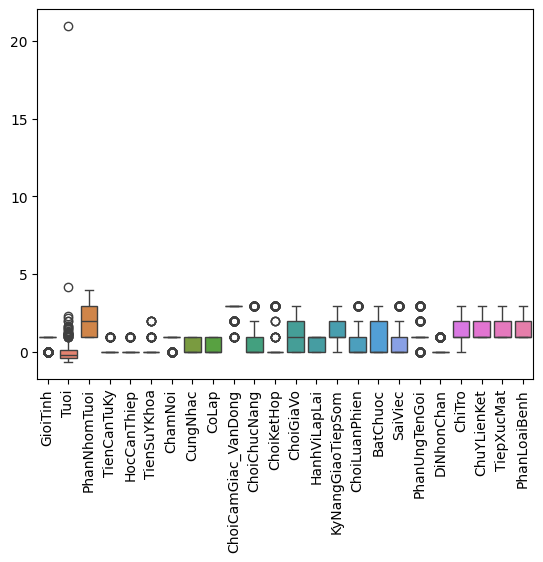

In [ ]:
# Vẽ biểu đồ hộp với các cột trong df (đảm bảo trục x có các tên cột đúng)
sns.boxplot(data=df)

# Xoay nhãn trên trục x 90 độ để dễ đọc
plt.xticks(rotation=90)

# Hiển thị biểu đồ
plt.show()

# Vì dữ liệu có tính chất phân loại thứ tự (ordinal) nên kh bỏ ngoại lai


### 1.4. ĐÁNH GIÁ DỮ LIỆU CARDINALITY

In [ ]:
# Tính cardinality của cột GioiTinh
column = 'Tuoi'
unique_values = df[column].nunique()
total_samples = len(df)
ratio = unique_values / total_samples

print(f"Cột {column}: {unique_values} giá trị duy nhất (tỷ lệ: {ratio:.2%})")

# Phân loại cardinality
if unique_values < 10:
    print(f"Cột {column}: Cardinality thấp")
elif 10 <= unique_values <= 50:
    print(f"Cột {column}: Cardinality trung bình")
else:
    print(f"Cột {column}: Cardinality cao")

Cột Tuoi: 69 giá trị duy nhất (tỷ lệ: 11.64%)
Cột Tuoi: Cardinality cao


In [ ]:
# Tính cardinality của cột GioiTinh
column = 'PhanLoaiBenh'
unique_values = df[column].nunique()
total_samples = len(df)
ratio = unique_values / total_samples

print(f"Cột {column}: {unique_values} giá trị duy nhất (tỷ lệ: {ratio:.2%})")

# Phân loại cardinality
if unique_values < 10:
    print(f"Cột {column}: Cardinality thấp")
elif 10 <= unique_values <= 50:
    print(f"Cột {column}: Cardinality trung bình")
else:
    print(f"Cột {column}: Cardinality cao")

Cột PhanLoaiBenh: 3 giá trị duy nhất (tỷ lệ: 0.51%)
Cột PhanLoaiBenh: Cardinality thấp


LOẠI BỎ CỘT CÓ CARDINALITY CAO ĐỂ GIẢM ĐỘ PHỨC TẠP CHO MÔ HÌNH

In [ ]:
# Danh sách các cột cần loại bỏ
dropTuoi = [
    'Tuoi'
]

# Loại bỏ các cột không cần thiết
df = df.drop(columns=dropTuoi)

# Kiểm tra lại DataFrame sau khi loại bỏ cột
df.head()

,GioiTinh,PhanNhomTuoi,TienCanTuKy,HocCanThiep,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiCamGiac_VanDong,ChoiChucNang,...,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,PhanLoaiBenh
0,0,2.0,0,1,0,1,0,1,3,0,...,1,1,3,1,3,1,3,2,2,2
1,1,3.0,1,0,0,1,0,1,3,3,...,1,0,0,2,0,0,1,1,2,1
2,1,2.0,0,0,0,1,0,0,3,3,...,1,0,3,0,1,0,2,1,1,1
3,0,1.0,0,0,0,0,0,0,2,0,...,1,0,1,0,1,1,1,2,2,1
4,1,1.0,0,0,0,1,0,0,2,0,...,1,0,1,0,1,0,1,2,2,2


In [ ]:
X = df.drop("PhanLoaiBenh", axis=1)
y = df['PhanLoaiBenh']

In [ ]:
# Tính hệ số tương quan để chọn ra các cột tương đồng

df.corr()

,GioiTinh,PhanNhomTuoi,TienCanTuKy,HocCanThiep,TienSuYKhoa,ChamNoi,CungNhac,CoLap,ChoiCamGiac_VanDong,ChoiChucNang,...,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,PhanLoaiBenh
GioiTinh,1.000000,-0.005267,-0.027921,-0.062757,0.028000,0.017307,0.041031,0.019858,-0.082146,0.000421,...,-0.047736,-0.034355,-0.041074,-0.077073,-0.064729,0.029063,-0.005017,-0.130185,-0.094914,-0.128401
PhanNhomTuoi,-0.005267,1.000000,0.172612,0.225125,0.008464,-0.093093,0.193353,-0.015993,0.281550,-0.213768,...,0.237995,-0.111322,-0.143099,0.002280,-0.121225,-0.168596,-0.042268,0.085046,0.068162,-0.264174
TienCanTuKy,-0.027921,0.172612,1.000000,0.157960,-0.017660,0.006793,0.064636,0.116216,0.043361,0.012284,...,0.027733,0.058755,-0.068899,0.117539,-0.050386,-0.072550,-0.062335,-0.073877,-0.029583,-0.124890
HocCanThiep,-0.062757,0.225125,0.157960,1.000000,0.004525,0.020862,0.076594,0.035098,0.083290,-0.037442,...,0.127340,0.026678,-0.044390,0.075881,-0.047009,-0.064565,0.034969,0.054519,0.055506,-0.092919
TienSuYKhoa,0.028000,0.008464,-0.017660,0.004525,1.000000,0.039053,-0.070141,-0.007765,-0.055554,-0.013839,...,0.001937,0.061356,0.004368,-0.006020,0.012277,0.001844,-0.047893,-0.028224,-0.050401,-0.017298
ChamNoi,0.017307,-0.093093,0.006793,0.020862,0.039053,1.000000,0.184104,0.328651,-0.013415,0.075930,...,-0.299047,0.182989,-0.068298,0.225052,0.034296,0.030639,0.034281,-0.408184,-0.320614,-0.312571
CungNhac,0.041031,0.193353,0.064636,0.076594,-0.070141,0.184104,1.000000,0.399288,0.010176,0.023322,...,0.067260,0.261083,-0.273228,0.306924,0.101656,-0.026359,0.051649,-0.109223,-0.086676,-0.173654
CoLap,0.019858,-0.015993,0.116216,0.035098,-0.007765,0.328651,0.399288,1.000000,-0.058748,0.231916,...,-0.107490,0.471310,-0.284533,0.456483,0.152639,0.187377,0.110842,-0.301986,-0.178958,-0.145099
ChoiCamGiac_VanDong,-0.082146,0.281550,0.043361,0.083290,-0.055554,-0.013415,0.010176,-0.058748,1.000000,-0.115953,...,0.104280,-0.001798,0.004669,0.063575,0.046156,-0.190253,0.067685,0.142199,0.067465,-0.065338
ChoiChucNang,0.000421,-0.213768,0.012284,-0.037442,-0.013839,0.075930,0.023322,0.231916,-0.115953,1.000000,...,0.040655,0.267266,0.098789,0.183536,0.108434,0.161656,0.077692,0.008384,0.080692,0.127970


In [ ]:
# Mức độ liên quan giữa các feature vs cột kết quả

from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(X,y)
mic


array([0.        , 0.05364351, 0.00699495, 0.        , 0.02172599,
       0.11301095, 0.        , 0.05732511, 0.04253294, 0.        ,
       0.02200687, 0.0005296 , 0.02111691, 0.09732712, 0.02160022,
       0.00739282, 0.0256808 , 0.09171855, 0.00772999, 0.07162494,
       0.20562662, 0.16875196])

In [ ]:
# Sắp xếp các cột theo mức độ quan trọng

mic = pd.Series(mic)
mic.index = X.columns
mic.sort_values(ascending=False)


,0
ChuYLienKet,0.205627
TiepXucMat,0.168752
ChamNoi,0.113011
KyNangGiaoTiepSom,0.097327
PhanUngTenGoi,0.091719
ChiTro,0.071625
CoLap,0.057325
PhanNhomTuoi,0.053644
ChoiCamGiac_VanDong,0.042533
SaiViec,0.025681


In [ ]:
# Xóa bỏ các cột quan trọng
X = X.drop(['HocCanThiep', 'GioiTinh', 'CungNhac', 'ChoiChucNang'],axis=1)

KeyError: "['HocCanThiep', 'GioiTinh', 'CungNhac', 'ChoiChucNang'] not found in axis"

In [ ]:
X.head()

,PhanNhomTuoi,TienCanTuKy,TienSuYKhoa,ChamNoi,CoLap,ChoiCamGiac_VanDong,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat
0,2.0,0,0,1,1,3,2,0,0,1,1,3,1,3,1,3,2,2
1,3.0,1,0,1,1,3,3,0,1,1,0,0,2,0,0,1,1,2
2,2.0,0,0,1,0,3,3,2,0,1,0,3,0,1,0,2,1,1
3,1.0,0,0,0,0,2,1,1,1,1,0,1,0,1,1,1,2,2
4,1.0,0,0,1,0,2,1,1,0,1,0,1,0,1,0,1,2,2


# 2. TRAINING DECISION TREE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# 1. Giữ lại 10 đặc trưng có MI cao nhất
top_features = mic.sort_values(ascending=False).head(10).index.tolist()
X_top = X[top_features]

# 2. Mã hóa nhãn target (1–3) → 0–2
le = LabelEncoder()
y = le.fit_transform(df['PhanLoaiBenh'])  # y_encoded

# 3. Ánh xạ tên class ngắn gọn
short_labels_map = {
    1: 'YES',
    2: 'THINKING',
    3: 'NO'
}
class_names = [short_labels_map[int(label)] for label in le.classes_]

# 3. CHIA TẬP DỮ LIỆU

In [ ]:
# 4. Tách train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 474 dòng
Kích thước tập test: 119 dòng


In [ ]:
# 5. Huấn luyện mô hình
# Training lần 1 ~ accuracy ~0.67
# model = DecisionTreeClassifier(criterion='entropy', random_state=42)

model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

# 4. ĐÁNH GIÁ MÔ HÌNH

In [ ]:
# 6. Dự đoán
y_pred = model.predict(X_test)

# 7. Đánh giá lần 1
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         YES       0.70      0.78      0.74        64
    THINKING       0.58      0.48      0.53        44
          NO       0.67      0.73      0.70        11

    accuracy                           0.66       119
   macro avg       0.65      0.66      0.65       119
weighted avg       0.66      0.66      0.66       119

Accuracy: 0.6638655462184874


In [ ]:
# 6. Dự đoán
y_pred = model.predict(X_test)

# 7. Đánh giá lần 2
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         YES       0.74      0.75      0.74        64
    THINKING       0.62      0.52      0.57        44
          NO       0.59      0.91      0.71        11

    accuracy                           0.68       119
   macro avg       0.65      0.73      0.68       119
weighted avg       0.68      0.68      0.68       119

Accuracy: 0.680672268907563


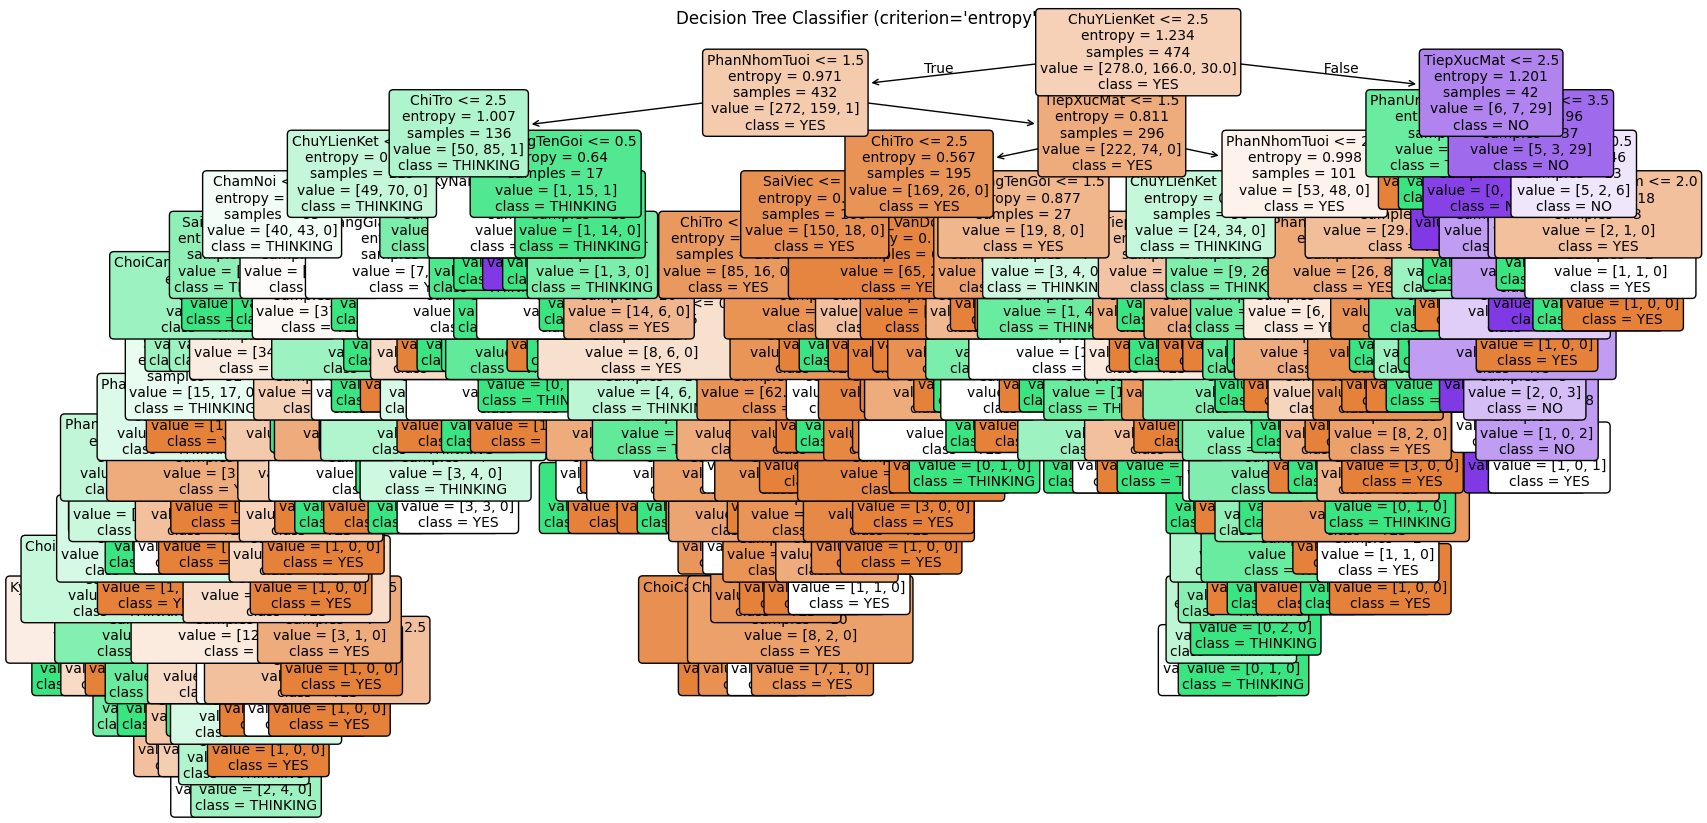

In [ ]:
# 8. Vẽ cây
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_top.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier (criterion='entropy')")
plt.show()

# 5. CẢI TIẾN ACCURACY MODEL

Grid Search hoặc Randomized Search
Tự động thử nhiều giá trị max_depth, min_samples_split, min_samples_leaf, v.v., để tìm ra tổ hợp tốt nhất.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['entropy', 'gini']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best CV score: 0.715909279556088


In [ ]:
# 1. Huấn luyện lại mô hình với tham số tốt nhất
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=3,
    min_samples_split=2,
    random_state=42
)
best_model.fit(X_train, y_train)

# 2. Dự đoán trên tập kiểm tra
y_pred = best_model.predict(X_test)

# 3. Đánh giá kết quả
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         YES       0.70      0.86      0.77        64
    THINKING       0.71      0.39      0.50        44
          NO       0.62      0.91      0.74        11

    accuracy                           0.69       119
   macro avg       0.68      0.72      0.67       119
weighted avg       0.69      0.69      0.67       119

Accuracy: 0.6890756302521008


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4, 6, 8, 10, 15, 17],
    'min_samples_split': [2, 3, 4, 5, 7, 8, 9, 10, 11, 15, 16, 17, 18, 20],
    'min_samples_leaf': [1, 3, 5, 7, 8, 9],
    'criterion': ['entropy', 'gini']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV score: 0.7203601321543919


In [ ]:
# 1. Huấn luyện lại mô hình với tham số tốt nhất
best_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    min_samples_leaf=8,
    min_samples_split=2,
    random_state=42
)
best_model.fit(X_train, y_train)

# 2. Dự đoán trên tập kiểm tra
y_pred = best_model.predict(X_test)

# 3. Đánh giá kết quả
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         YES       0.73      0.80      0.76        64
    THINKING       0.65      0.55      0.59        44
          NO       0.75      0.82      0.78        11

    accuracy                           0.71       119
   macro avg       0.71      0.72      0.71       119
weighted avg       0.70      0.71      0.70       119

Accuracy: 0.7058823529411765


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 6, 8, 10, 13, 16],
    'min_samples_split': [1, 3, 5, 7, 9, 12, 15, 16, 17, 20],
    'min_samples_leaf': [1, 7, 10, 12, 15, 17],
    'criterion': ['entropy', 'gini']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 3}
Best CV score: 0.720955458624936


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

# ĐIỀU CHỈNH NHÃN DÁN DỮ LIỆU TARGET 0-1

In [ ]:
# Bước này thay đổi nhãn đã gán số:
# 1 (YES)  → 1 (CÓ)
# 2 (THINKING) → 1 (CÓ)
# 3 (NO) → 0 (KHÔNG)

df['TargetBinary'] = df['PhanLoaiBenh'].apply(lambda x: 1 if x in [1, 2] else 0)


In [ ]:
X_binary = X[top_features]  # hoặc X đã chọn sẵn
y_binary = df['TargetBinary']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model_binary = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
model_binary.fit(X_train, y_train)

y_pred = model_binary.predict(X_test)

print("Classification Report (binary):")
print(classification_report(y_test, y_pred, target_names=['KHÔNG', 'CÓ']))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report (binary):
              precision    recall  f1-score   support

       KHÔNG       0.69      0.82      0.75        11
          CÓ       0.98      0.96      0.97       108

    accuracy                           0.95       119
   macro avg       0.84      0.89      0.86       119
weighted avg       0.95      0.95      0.95       119

Accuracy: 0.9495798319327731


In [ ]:
cols_to_export = top_features + ['TargetBinary']
df[cols_to_export].to_excel("dataset_v3_binary.xlsx", index=False)
# df[cols_to_export].to_excel("outputs/dataset_v3_binary.xlsx", index=False)

In [ ]:
df.to_excel("dataset_v3_123.xlsx", index=False)

# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6, random_state=42)

# Tính accuracy với 5-fold
scores = cross_val_score(model, X_top, y_binary, cv=5, scoring='accuracy')

print("Cross-validation accuracy:", scores)
print("Trung bình:", scores.mean())

Cross-validation accuracy: [0.99159664 0.96638655 0.98319328 0.95762712 0.94067797]
Trung bình: 0.9678963110667997


# LẤY TOÀN BỘ CÁC COLUMNS CỦA DATASET ĐỂ ĐÁNH GIÁ THEY VÌ TOP 10 NHƯ HIỆN TẠI

In [ ]:
X_full_mic = X.copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['PhanLoaiBenh'])

short_labels_map = {
    1: 'YES',
    2: 'THINKING',
    3: 'NO'
}
class_names = [short_labels_map[int(label)] for label in le.classes_]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_full_mic, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

         YES       0.75      0.77      0.76        64
    THINKING       0.65      0.55      0.59        44
          NO       0.59      0.91      0.71        11

    accuracy                           0.70       119
   macro avg       0.66      0.74      0.69       119
weighted avg       0.70      0.70      0.69       119

Accuracy: 0.6974789915966386


# CHUẨN HÓA TARGET VỀ CÓ/KHÔNG NGUY CƠ MẮC TỰ KỶ

In [ ]:
X_full_mic.head()

,PhanNhomTuoi,TienCanTuKy,TienSuYKhoa,ChamNoi,CoLap,ChoiCamGiac_VanDong,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat
0,2.0,0,0,1,1,3,2,0,0,1,1,3,1,3,1,3,2,2
1,3.0,1,0,1,1,3,3,0,1,1,0,0,2,0,0,1,1,2
2,2.0,0,0,1,0,3,3,2,0,1,0,3,0,1,0,2,1,1
3,1.0,0,0,0,0,2,1,1,1,1,0,1,0,1,1,1,2,2
4,1.0,0,0,1,0,2,1,1,0,1,0,1,0,1,0,1,2,2


In [ ]:
# Giả sử cột 'PhanLoaiBenh' đã được mã hóa thành số 1, 2, 3 như:
# 1 → tuky (YES), 2 → theodoitukyl2 (THINKING), 3 → khongmactukyptbtkhongbenh (NO)

df['TargetBinary'] = df['PhanLoaiBenh'].apply(lambda x: 1 if x in [1, 2] else 0)
y_binary = df['TargetBinary']

In [ ]:
selected_features = mic[mic > 0].sort_values(ascending=False).index.tolist()
X_full_mic = X[selected_features]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_full_mic, y_binary, test_size=0.2, random_state=42)

# Mô hình Decision Tree nhị phân
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print("\nClassification Report (Binary):\n")
print(classification_report(y_test, y_pred, target_names=["KHÔNG", "CÓ"]))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report (Binary):

              precision    recall  f1-score   support

       KHÔNG       0.82      0.82      0.82        11
          CÓ       0.98      0.98      0.98       108

    accuracy                           0.97       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.97      0.97      0.97       119

Accuracy: 0.9663865546218487


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6, random_state=42)

# Tính accuracy với 5-fold
scores = cross_val_score(model, X_full_mic, y_binary, cv=5, scoring='accuracy')

print("Cross-validation accuracy:", scores)
print("Trung bình:", scores.mean())

Cross-validation accuracy: [0.97478992 0.98319328 0.95798319 0.96610169 0.94067797]
Trung bình: 0.9645492095143142


In [ ]:
cols_to_export = X_full_mic.columns.tolist() + ['TargetBinary']
df[cols_to_export].to_excel("full_dataset_v3_binary.xlsx", index=False)


In [ ]:
df.to_excel("full_dataset_v3_123.xlsx", index=False)